In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet('data/banco_carnes_un_v9_ed.parquet')

df = df.fillna(0)
df.replace([np.inf, -np.inf], 0, inplace=True)

VIS_FIELDS = [
    'codigo',
    #'ano',
	'item',
	#'un',
	'qt',
	'valor_un',
	'valor',
	#'valor_real,
	'un_adj',
    'price_kg',
    'rule_apply',
    'outlier',
    #'rule_version',
    #'rule_id'
    #'is_outlier_qt',
    #'quartile_range_valor_un',
    #'quartile_range_qt'
]

# Keep original values in new variables

In [4]:
df_org_values = df.query(
    "rule_apply == 0 and (price_kg == 0 or unit_kg == 0) and un_adj == 'KG'"
)

df.loc[df_org_values.index, 'price_kg'] = df_org_values['valor_un']
df.loc[df_org_values.index, 'unit_kg'] = df_org_values['qt']
df['outlier'] = 0

# Update outliers

In [5]:
df.loc[
	(df['codigo'] == 41) &
    ((df['price_kg'] > 25) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 11) &
    ((df['price_kg'] > 60) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 14) &
    ((df['price_kg'] > 38) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 22) &
    ((df['price_kg'] > 40) | (df['price_kg'] < 2.55)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 12) &
    ((df['price_kg'] > 40) | (df['price_kg'] < 2.55)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 51) &
    ((df['price_kg'] > 43) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 15) &
    ((df['price_kg'] > 60) | (df['price_kg'] < 4)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 31) &
    ((df['price_kg'] > 45) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 33) &
    ((df['price_kg'] > 45) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 32) &
    ((df['price_kg'] > 45) | (df['price_kg'] < 5)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 16) &
    ((df['price_kg'] > 45) | (df['price_kg'] < 3)),
    'outlier'
] = 1

df.loc[
	(df['codigo'] == 21) &
    ((df['price_kg'] > 60) | (df['price_kg'] < 3)),
    'outlier'
] = 1

In [6]:
df.to_parquet('data/banco_carnes_un_v9_ed.parquet')

# Show chart

Text(0, 0.5, 'Preço/Kg (R$)')

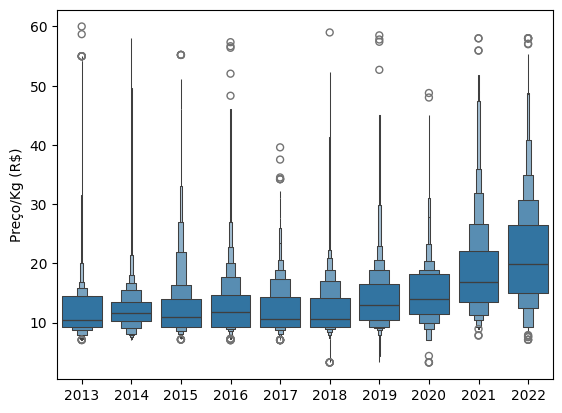

In [9]:
sns.boxenplot(data=df.query('codigo == 21 and outlier == 0'), x="ano", y="price_kg")

plt.xlabel('')
plt.ylabel('Preço/Kg (R$)')